In [1]:
## 1D heat equation using scipy fft

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams.update({'font.size':18})


D = 10e-6
T=273
L = 10
N = 100
dx = L/N

x = np.arange(-L,L,dx)


In [2]:
omega_x = np.pi*np.fft.fftfreq(N,d =0.1) # 2*pi*omega


Text(0, 0.5, 'Initial Concentration')

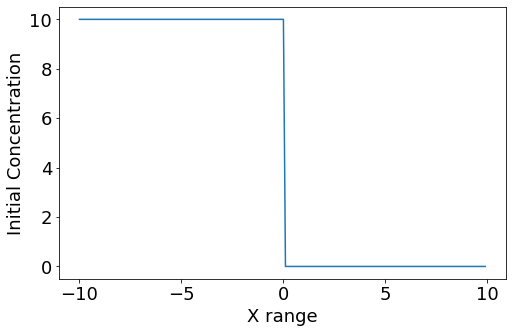

In [3]:
## Initialize the function U(Concentration) and plot it
#surface of iron is at x=0
#x<0 -> carbon
#x>0 -> iron matrix
u_initial = np.zeros_like(x)

for i, j in enumerate(x):
    if j <= 0:
        u_initial[i] = 10
    else:
        u_initial[i] = 0

## Plotting
plt.plot(x ,u_initial)
plt.xlabel('X range')
plt.ylabel('Initial Concentration')

In [4]:
from scipy import fft
##fft for x
ux_ft = fft.dst(u_initial) #we use dst beacuse it is semi infinite diffusion.

In [5]:
dt = 0.1
t = np.arange(0,20,dt)

In [6]:
def rhs_diff_eqn_x(u_ftRI_coeff,t,omega,D):
    d_uft = D * (np.power(omega_x,2))*u_ftRI_coeff + (np.sqrt(2/np.pi))*omega_x*250
    return d_uft

In [7]:
usoln_ftRI_coeff_x = odeint(rhs_diff_eqn_x, ux_ft,t,args= (omega_x,D))

ValueError: operands could not be broadcast together with shapes (100,) (200,) 

In [ ]:
u_sol = usoln_ftRI_coeff
u_soln=[]
for k in range(len(t)):
    u_soln.append(fft.idst(u_sol[k,:]))